## 2.2 示例：使用k-近邻算法改进约会网站的配对效果

### 2.2.1 准备数据：从文本文件中解析数据

In [2]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import kNN

datingDataMat,datingLabels = kNN.file2matrix('datingTestSet.txt')

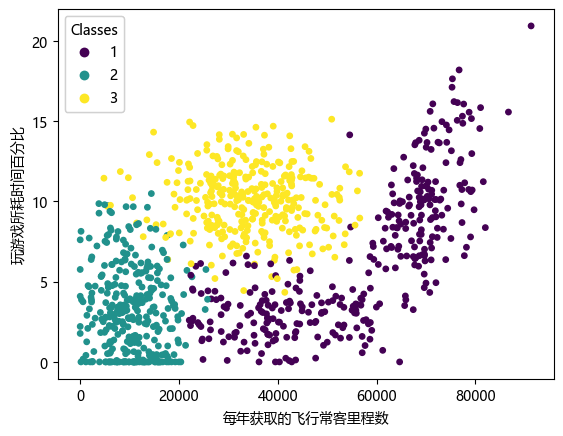

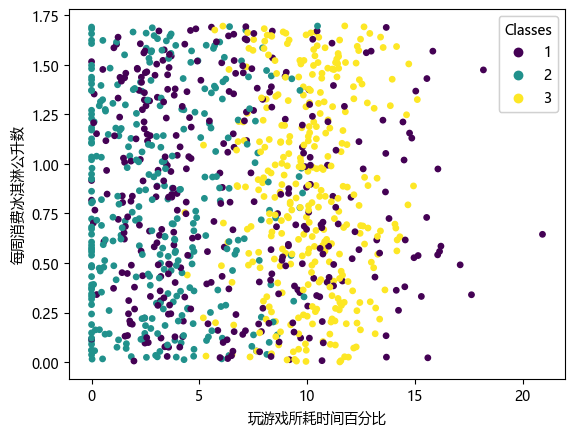

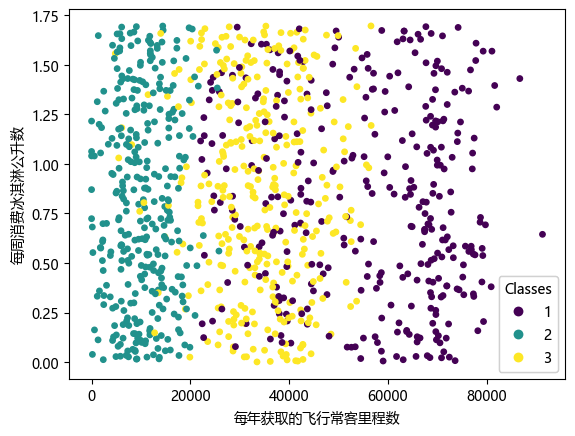

In [3]:
def drawScatter(x, y, labels, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sc = ax.scatter(x, y, 15, array(labels))

    # 添加图例
    legend1 = ax.legend(*sc.legend_elements(),loc="best", title="Classes")
    ax.add_artist(legend1)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

drawScatter(datingDataMat[:,0], datingDataMat[:,1], datingLabels, '每年获取的飞行常客里程数', '玩游戏所耗时间百分比')
drawScatter(datingDataMat[:,1], datingDataMat[:,2], datingLabels, '玩游戏所耗时间百分比', '每周消费冰淇淋公升数')
drawScatter(datingDataMat[:,0], datingDataMat[:,2], datingLabels, '每年获取的飞行常客里程数', '每周消费冰淇淋公升数')


plt.show()

### 2.2.3 准备数据：归一化数据

In [4]:
normMat, ranges, minVals = kNN.autoNorm(datingDataMat)

### 2.2.4 测试算法：作为完整程序验证分类器

In [5]:
def datingClassTest(hoRatio, k, isPrint=False):
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = kNN.classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], k)
        # print("classifier 识别结果为: %d, 真实结果为: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0

    if isPrint:
        print("总数据量：{}".format(m))
        print("训练集数据量：{}".format(m-numTestVecs))
        print("错误数/测试集数据量：{}/{}".format(errorCount, numTestVecs))
        print("错误率: %f" % (errorCount / float(numTestVecs)))

    return errorCount / float(numTestVecs)

In [6]:
datingClassTest(0.1, 3, isPrint=True)

总数据量：1000
训练集数据量：900
错误数/测试集数据量：5.0/100
错误率: 0.050000


0.05

In [7]:
import itertools

ks = arange(1,21)
hoRatios = linspace(0, 1, 100)
x = list(itertools.product(ks, hoRatios))
err = zeros(shape=(ks.size, hoRatios.size))

for ik, ih in list(itertools.product(arange(ks.size), arange(hoRatios.size))):
    k = ks[ik]
    h = hoRatios[ih]
    # print(k, h)
    err[ik, ih] = datingClassTest(h, k)

In [10]:
# %matplotlib qt5 # 交互式
def drawPlotSurface(x, y, z, xlabel, ylabel, zlabel):
    fig = plt.figure()
    ax3 = plt.axes(projection='3d')
    X, Y = meshgrid(x, y)
    Z = z

    ax3.plot_surface(X,Y,Z,cmap='rainbow')
    ax3.set_xlabel(xlabel)
    ax3.set_ylabel(ylabel)
    ax3.set_zlabel(zlabel)

    plt.show()

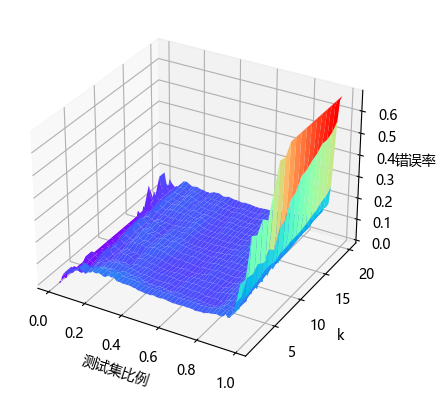

In [13]:
drawPlotSurface(hoRatios, ks, err, "测试集比例", "k", "错误率")

### 2.2.5 使用算法：构建完整可用系统

In [29]:
# 示例输入：
# 0.1, 500, 1 => in small doses
# 0.9, 9000, 1 => in small doses
kNN.classifyPerson()

You will probably like this person: in small doses


## 2.3 示例：手写识别系统

### 2.3.1 准备数据：将图像转换成测试向量

In [82]:
from PIL import Image

def txt2Img(filename, x=32, y=32):
    with open(filename) as f:
        data = f.readlines()
    arr = zeros(shape=(y, x, 3), dtype='uint8')

    for i in range(y):
        for j in range(x):
            arr[j, i, :] = eval(data[j][i])*array([255, 255, 255])

    img = Image.fromarray(arr)
    return img

In [118]:
def drawDigitImg(flex):
    fig = plt.figure()
    for i in range(10):
        img = txt2Img('./trainingDigits/{}_{}.txt'.format(i, flex))
        x = i % 3
        y = i // 3
        ax = plt.subplot2grid((4,3), (y, x))
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        im = ax.imshow(img)
    plt.show()

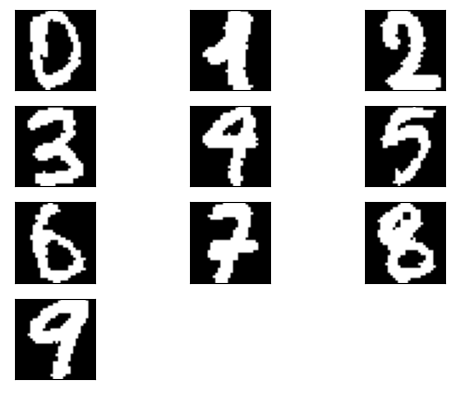

In [119]:
drawDigitImg(0)

In [116]:
testVector = kNN.img2vector('./trainingDigits/0_0.txt')


'[[0. 0. 0. ... 0. 0. 0.]]'

### 2.3.2 测试算法：使用k-近邻算法识别手写数字

In [120]:
kNN.handwritingClassTest()

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answe